In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('assemblydata.csv')

In [3]:
df.head()

,AC No.,AC Name,Winning Party,Winning Candidate,Winner Votes,Runner Up Party,Runner Up Candidate,Runner Up Votes,Voting Turnout %,Total Voters,Winning Margin,District Name
0,1,Nippani,BJP,SHASHIKALA JOLLE,"87,006",INC,KAKASO PANDURANG PATIL,"78,500",81.19%,"211,827","8,506",BELAGAVI
1,2,Chikkodi-Sadalga,INC,GANESH HUKKERI,"91,467",BJP,ANNASAHEB SHANKAR JOLLE,"80,898",84.78%,"210,480","10,569",BELAGAVI
2,3,Athani,INC,MAHESH IRANAGOUDA KUMATHALLI,"82,094",BJP,LAXMAN SANGAPPA SAVADI,"79,763",80.67%,"213,935","2,331",BELAGAVI
3,4,Kagwad,INC,BALASAHEB PATIL,"83,060",BJP,BHARAMAGOUDA ALAGOUDA KAGE,"50,118",79.98%,"181,486","32,942",BELAGAVI
4,5,Kudachi,BJP,P RAJIV,"67,781",INC,AMIT SHAMA GHATAGE,"52,773",75.86%,"180,233","15,008",BELAGAVI


### 1. PARTIES WHO WON ATLEAST ONE CONSTITUENCY

In [4]:
df['Winning Party'].unique()

array(['BJP', 'INC', 'JDS', 'OTHERS', '-'], dtype=object)

In [5]:
# BJP,INC,JDS,OTHERS are valid parties, but '-' is not a party, so let's see what data does it hold

In [6]:
df[df['Winning Party'] == '-']

,AC No.,AC Name,Winning Party,Winning Candidate,Winner Votes,Runner Up Party,Runner Up Candidate,Runner Up Votes,Voting Turnout %,Total Voters,Winning Margin,District Name
153,154,Rajarajeshwarinagar,-,-,-,-,-,-,-,"471,459",-,B.B.M.P (CENTRAL)
172,173,Jayanagar,-,-,-,-,-,-,-,"203,184",-,B.B.M.P(SOUTH)


In [7]:
# So, elections were not conducted in these areas [atleast that's what our data tells us] , due to some unavoidable circumstances

In [8]:
# So, it's better to remove these 2 constituencies from our data, so that it won't cause us any future problems

In [9]:
df.drop(df[df['Winning Party'] == '-'].index,inplace=True)

In [10]:
# Just to be sure that we have removed those 2 rows, let's run the initial query once again

In [11]:
df['Winning Party'].unique()

array(['BJP', 'INC', 'JDS', 'OTHERS'], dtype=object)

In [12]:
# So, we have completed the first step of our data analysis, that is to find what all parties have won atleast a single constituency

In [13]:
df.reset_index(inplace=True)

In [14]:
df.drop(labels = 'index',axis = 1,inplace=True)

### 2. VOTING TURNOUT IN EACH DISTRICT

In [15]:
type(df['Voting Turnout %'][0])

str

In [16]:
df['Voting Turnout %'][0]

'81.19%'

In [17]:
# Even though it is a floating point, it is represented as a string, so first we need to convert it into valid float datatype to perform aggregate operations

In [18]:
vot_turnout = df['Voting Turnout %']

In [19]:
vot_turnout[0]

'81.19%'

In [20]:
vot_turnout[0].split('%')

['81.19', '']

In [21]:
float(vot_turnout[0].split('%')[0])

81.19

In [22]:
v_turn = []
print(vot_turnout.size)
i = 0
for i in range(0,len(vot_turnout)):
    x = float(vot_turnout[i].split('%')[0])
    v_turn.append(x)
    

222


In [23]:
v_turn = np.array(v_turn)

In [24]:
df.drop('Voting Turnout %',axis = 1,inplace=True)

In [25]:
df['Voting Turnout %'] = pd.Series(v_turn)

In [26]:
df['Voting Turnout %'][0]

81.189999999999998

In [27]:
df['Voting Turnout %'] = pd.to_numeric(df['Voting Turnout %'])

In [28]:
type(df['Voting Turnout %'][0])

numpy.float64

In [29]:
## Now that the type of the column is converted to a numeric type, we can now apply our analysis on it

In [30]:
## We want the voting turnout in each district

In [31]:
df.columns

Index(['AC No.', 'AC Name', 'Winning Party', 'Winning Candidate',
       'Winner Votes', 'Runner Up Party', 'Runner Up Candidate',
       'Runner Up Votes', 'Total Voters', 'Winning Margin', 'District Name',
       'Voting Turnout %'],
      dtype='object')

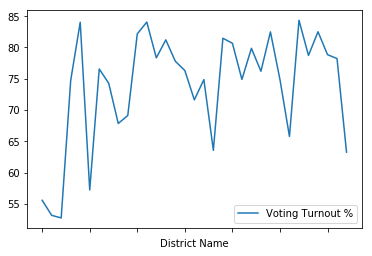

In [32]:
df.groupby(['District Name'])['Voting Turnout %'].mean().plot(legend = True)

In [33]:
dname = df['District Name'].unique()

In [34]:
dname

array(['BELAGAVI', 'BAGALKOT', 'BIJAPUR', 'GULBARGA', 'YADGIR', 'BIDAR',
       'RAICHUR', 'KOPPAL', 'GADAG', 'DHARWAD', 'UTTARA KANNADA', 'HAVERI',
       'BELLARY', 'CHITRADURGA', 'DAVANAGERE', 'SHIMOGA', 'UDUPI',
       'CHIKKMAGALUR', 'TUMKUR', 'CHIKABALLAPUR', 'KOLAR',
       'BANGALORE URBAN', 'B.B.M.P(NORTH)', 'B.B.M.P (CENTRAL)',
       'B.B.M.P(SOUTH)', 'BANGALORE RURAL', 'RAMANAGARAM', 'MANDYA',
       'HASSAN', 'DAKSHINA KANNADA', 'KODAGU', 'MYSORE', 'CHAMARAJNAGAR'], dtype=object)

In [35]:
votingTurnout = df.groupby(['District Name'])['Voting Turnout %'].mean()

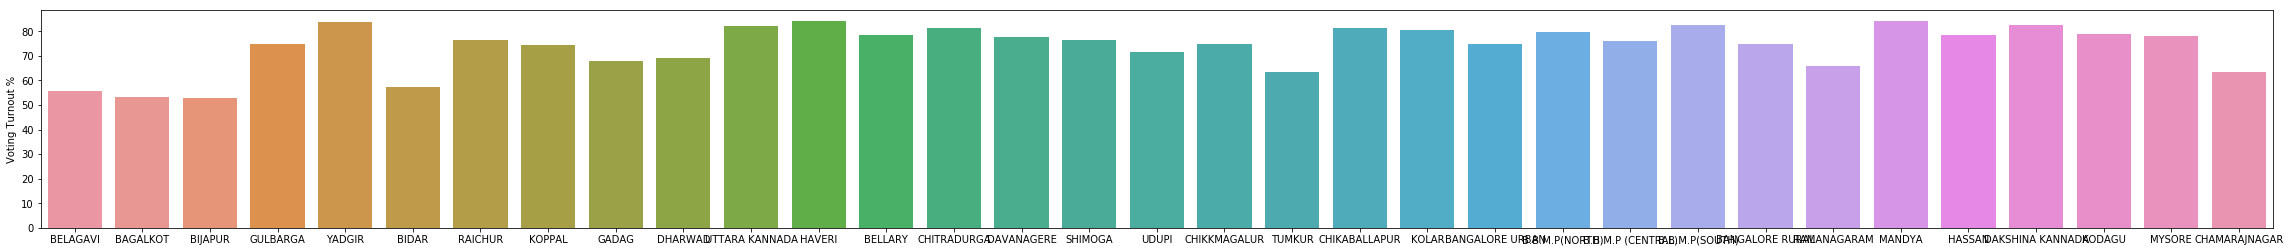

In [36]:
plt.figure(figsize=(40,4))
sns.barplot(x = dname, y = votingTurnout)

#### The width of the plot is increased so as to fit the entire districts

### A more concise plot

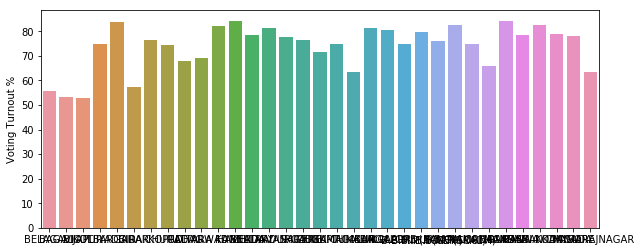

In [37]:
plt.figure(figsize=(10,4)) ## The district name can't be seen properly, so the width was increased in the earlier plot
sns.barplot(x = dname, y = votingTurnout)

In [38]:
# Further analysis on the same question

In [39]:
dname = pd.Series(dname,name ='District')

In [40]:
dname = pd.DataFrame(dname)

In [41]:
dname.columns

Index(['District'], dtype='object')

In [42]:
votTurn = pd.Series(votingTurnout,name ='Voting Turnout %')

In [43]:
votTurn = pd.DataFrame(votTurn)

In [44]:
votTurn.reset_index(inplace = True)

### The district with the maximum voting turnout is Yadgir

In [45]:
votTurn.max()

District Name       YADGIR
Voting Turnout %     84.35
dtype: object

### The district with the least turnout is: BBMP Central

In [46]:
votTurn.min()

District Name       B.B.M.P (CENTRAL)
Voting Turnout %                 52.8
dtype: object

### The average turnout is: 

In [47]:
votTurn.mean()

Voting Turnout %    73.874004
dtype: float64

### The deviation in the turnout is: 

In [48]:
votTurn.std()

Voting Turnout %    9.153231
dtype: float64

## 3. % WINNING OF EACH PARTIES

In [49]:
df.columns

Index(['AC No.', 'AC Name', 'Winning Party', 'Winning Candidate',
       'Winner Votes', 'Runner Up Party', 'Runner Up Candidate',
       'Runner Up Votes', 'Total Voters', 'Winning Margin', 'District Name',
       'Voting Turnout %'],
      dtype='object')

In [50]:
df['Winning Party'].unique()

array(['BJP', 'INC', 'JDS', 'OTHERS'], dtype=object)

In [51]:
percent = {'BJP':0,'INC':0,'JDS':0,'OTHERS':0}

In [52]:
df['Winning Party'][2]

'INC'

In [53]:
for i in range(0,len(df)):
    percent[df['Winning Party'][i]] = percent[df['Winning Party'][i]] + 1

In [54]:
percent

{'BJP': 104, 'INC': 78, 'JDS': 37, 'OTHERS': 3}

In [55]:
percent['BJP'] / sum(percent.values())

0.46846846846846846

In [56]:
percent['INC'] / sum(percent.values())

0.35135135135135137

In [57]:
percent['JDS'] / sum(percent.values())

0.16666666666666666

In [58]:
percent['OTHERS'] / sum(percent.values())

0.013513513513513514

### BJP won 103 constituencies, Congress won 78 constituencies, JDS won 36 constituencies, whereas 3 constituencies were won by others

### Instead of using Dictionaries for calculating the counts, we can do it in Pandas as well using the slice operation

#### BJP

In [59]:
len(df[df['Winning Party'] == 'BJP'])

104

#### Congress

In [60]:
len(df[df['Winning Party'] == 'INC'])

78

#### JDS

In [61]:
len(df[df['Winning Party'] == 'JDS'])

37

#### Others

In [62]:
len(df[df['Winning Party'] == 'OTHERS'])

3

## 4. WHICH PARTY WON THE MAXIMUM CONSTITUENCIES

In [63]:
max(percent,key = percent.get)

'BJP'

#### Of course it is BJP, as it won around 103 constituencies

In [64]:
percent.keys()

dict_keys(['BJP', 'INC', 'JDS', 'OTHERS'])

In [65]:
percent.values()

dict_values([104, 78, 37, 3])

([<matplotlib.axis.XTick at 0x231a14ff6d8>,
 <a list of 4 Text xticklabel objects>)

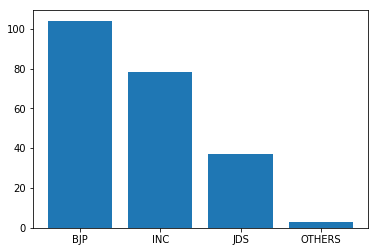

In [66]:
plt.bar(range(len(percent)), percent.values(), align='center')
plt.xticks(range(len(percent)), list(percent.keys()))


### 5. WINNER AND RUNNER UPs FOR EACH DISTRICT

In [67]:
df.columns

Index(['AC No.', 'AC Name', 'Winning Party', 'Winning Candidate',
       'Winner Votes', 'Runner Up Party', 'Runner Up Candidate',
       'Runner Up Votes', 'Total Voters', 'Winning Margin', 'District Name',
       'Voting Turnout %'],
      dtype='object')

In [68]:
dataFrame = df.groupby(by = 'District Name')['Winning Party'].value_counts()

In [69]:
dataFrame = pd.DataFrame(dataFrame)

In [70]:
dataFrame.columns

Index(['Winning Party'], dtype='object')

In [71]:
dataFrame.index

MultiIndex(levels=[['B.B.M.P (CENTRAL)', 'B.B.M.P(NORTH)', 'B.B.M.P(SOUTH)', 'BAGALKOT', 'BANGALORE RURAL', 'BANGALORE URBAN', 'BELAGAVI', 'BELLARY', 'BIDAR', 'BIJAPUR', 'CHAMARAJNAGAR', 'CHIKABALLAPUR', 'CHIKKMAGALUR', 'CHITRADURGA', 'DAKSHINA KANNADA', 'DAVANAGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI', 'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR', 'RAMANAGARAM', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTARA KANNADA', 'YADGIR'], ['BJP', 'INC', 'JDS', 'OTHERS']],
           labels=[[0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 20, 21, 22, 22, 22, 23, 23, 24, 25, 25, 25, 26, 26, 26, 27, 27, 28, 28, 29, 29, 29, 30, 31, 31, 32, 32, 32], [1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 3, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 3, 0, 1, 2, 3, 0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1

In [72]:
dataFrame = pd.DataFrame(dataFrame)

In [73]:
dataFrame

Winning Party
District Name     Winning Party               
B.B.M.P (CENTRAL) INC                        4
                  BJP                        2
B.B.M.P(NORTH)    INC                        4
                  BJP                        2
                  JDS                        1
B.B.M.P(SOUTH)    BJP                        4
                  INC                        2
BAGALKOT          BJP                        5
                  INC                        2
BANGALORE RURAL   INC                        2
                  JDS                        2
BANGALORE URBAN   BJP                        3
                  INC                        3
                  JDS                        1
BELAGAVI          BJP                       10
                  INC                        8
BELLARY           INC                        6
                  BJP                        3
BIDAR             INC                        4
                  BJP                        1
                  JDS                        1
BIJAPUR           BJP                        3
                  INC                        3
                  JDS                        2
CHAMARAJNAGAR     INC                        2
                  BJP                        1
                  OTHERS                     1
CHIKABALLAPUR     INC                        4
                  JDS                        1
CHIKKMAGALUR      BJP                        4
...                                        ...
HASSAN            BJP                        1
HAVERI            BJP                        4
                  INC                        1
                  OTHERS                     1
KODAGU            BJP                        2
KOLAR             INC                        4
                  JDS                        1
                  OTHERS                     1
KOPPAL            BJP                        3
                  INC                        2
MANDYA            JDS                        7
MYSORE            JDS                        5
                  BJP                        3
                  INC                        3
RAICHUR           INC                        3
                  BJP                        2
                  JDS                        2
RAMANAGARAM       JDS                        3
                  INC                        1
SHIMOGA           BJP                        6
                  INC                        1
TUMKUR            BJP                        4
                  JDS                        4
                  INC                        3
UDUPI             BJP                        5
UTTARA KANNADA    BJP                        4
                  INC                        2
YADGIR            BJP                        2
                  INC                        1
                  JDS                        1

[74 rows x 1 columns]

### Here the numbers denote the no.of constituencies won by the winning party in the corresponding district arranged in decreasing order

## 6. WHICH CONSTITUENCY IN THE DISTRICT HAD MAX SUPPORT FOR WHICH PARTY?

In [74]:
df.columns

Index(['AC No.', 'AC Name', 'Winning Party', 'Winning Candidate',
       'Winner Votes', 'Runner Up Party', 'Runner Up Candidate',
       'Runner Up Votes', 'Total Voters', 'Winning Margin', 'District Name',
       'Voting Turnout %'],
      dtype='object')

In [75]:
x = pd.DataFrame(df.groupby(by = ['District Name','AC Name'])['Winning Party'].first())

In [76]:
x

Winning Party
District Name     AC Name                         
B.B.M.P (CENTRAL) Chamrajapet                  INC
                  Chickpet                     BJP
                  Gandhinagar                  INC
                  Rajajinagar                  BJP
                  Shantinagar                  INC
                  Shivajinagar                 INC
B.B.M.P(NORTH)    C.V. Raman Nagar             BJP
                  Hebbal                       INC
                  K.R. Pura                    INC
                  Mahalakshmi Layout           JDS
                  Malleshwaram                 BJP
                  Pulakeshinagar               INC
                  Sarvagnannagar               INC
B.B.M.P(SOUTH)    B.T.M Layout                 INC
                  Basavanagudi                 BJP
                  Bommanahalli                 BJP
                  Govindarajanagar             BJP
                  Padmanabanagar               BJP
                  Vijayanagar                  INC
BAGALKOT          Badami                       INC
                  Bagalkot                     BJP
                  Bilgi                        BJP
                  Hungund                      BJP
                  Jamkhandi                    INC
                  Mudhol                       BJP
                  Terdal                       BJP
BANGALORE RURAL   Devanahalli                  JDS
                  Doddaballapur                INC
                  Hosakote                     INC
                  Nelamangala                  JDS
...                                            ...
SHIMOGA           Shimoga                      BJP
                  Shimoga Rural                BJP
                  Sorab                        BJP
                  Tirthahalli                  BJP
TUMKUR            Chikkanayakanhalli           BJP
                  Gubbi                        JDS
                  Koratagere                   INC
                  Kunigal                      INC
                  Madhugiri                    JDS
                  Pavagada                     INC
                  Sira                         JDS
                  Tiptur                       BJP
                  Tumkur City                  BJP
                  Tumkur Rural                 JDS
                  Turuvekere                   BJP
UDUPI             Baindur                      BJP
                  Kapu                         BJP
                  Karkala                      BJP
                  Kundapur                     BJP
                  Udupi                        BJP
UTTARA KANNADA    Bhatkal                      BJP
                  Haliyal                      INC
                  Karwar                       BJP
                  Kumta                        BJP
                  Sirsi                        BJP
                  Yellapur                     INC
YADGIR            Gurmitkal                    JDS
                  Shahapur                     INC
                  Shorapur                     BJP
                  Yadgir                       BJP

[222 rows x 1 columns]

## 7. Max and Minimum winning margins in each constituency for a district

In [77]:
win_margin = []

In [78]:
x = df['Winning Margin'][0]

In [79]:
x

'8,506'

In [80]:
x = x.split(',')

In [81]:
x

['8', '506']

In [82]:
x = ''.join(x)

In [83]:
x

'8506'

In [84]:
x = int(x)

In [85]:
x

8506

In [86]:
type(x)

int

In [87]:
win_marg = []

In [88]:
for i in range(len(df)):
    x = df['Winning Margin'][i]
    x = x.split(',')
    x = ''.join(x)
    x = int(x)
    win_marg.append(x)

In [89]:
type(win_marg[100])

int

In [90]:
win_marg = pd.Series(win_marg,name = 'Winning Margin')

In [91]:
win_marg = pd.DataFrame(win_marg)

In [92]:
df.drop('Winning Margin',axis = 1, inplace=True)

In [93]:
df['Winning Margin'] = win_marg

In [94]:
df.groupby('District Name')['Winning Margin'].max()

District Name
B.B.M.P (CENTRAL)    33137
B.B.M.P(NORTH)       81626
B.B.M.P(SOUTH)       47162
BAGALKOT             20889
BANGALORE RURAL      24321
BANGALORE URBAN      42503
BELAGAVI             58692
BELLARY              21271
BIDAR                31814
BIJAPUR              29715
CHAMARAJNAGAR        19454
CHIKABALLAPUR        30431
CHIKKMAGALUR         26314
CHITRADURGA          42045
DAKSHINA KANNADA     29799
DAVANAGERE           29221
DHARWAD              40487
GADAG                29993
GULBARGA             19212
HASSAN               53012
HAVERI               21271
KODAGU               16015
KOLAR                44251
KOPPAL               26351
MANDYA               54030
MYSORE               58616
RAICHUR              21045
RAMANAGARAM          79909
SHIMOGA              46107
TUMKUR               25563
UDUPI                56405
UTTARA KANNADA       32750
YADGIR               30974
Name: Winning Margin, dtype: int64

In [95]:
df.groupby('District Name')['Winning Margin'].min()

District Name
B.B.M.P (CENTRAL)     7934
B.B.M.P(NORTH)       12227
B.B.M.P(SOUTH)        2775
BAGALKOT              1696
BANGALORE RURAL       7597
BANGALORE URBAN       5671
BELAGAVI              2331
BELLARY               2679
BIDAR                10245
BIJAPUR               3186
CHAMARAJNAGAR         3513
CHIKABALLAPUR         5673
CHIKKMAGALUR          1989
CHITRADURGA          12875
DAKSHINA KANNADA     15971
DAVANAGERE            4071
DHARWAD                634
GADAG                 1868
GULBARGA               697
HASSAN                4942
HAVERI                 555
KODAGU               13353
KOLAR                 6715
KOPPAL                7973
MANDYA               17119
MYSORE                1779
RAICHUR                213
RAMANAGARAM          21530
SHIMOGA               3777
TUMKUR                 409
UDUPI                11917
UTTARA KANNADA        1483
YADGIR               12881
Name: Winning Margin, dtype: int64